___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

A Decision Tree is a type of algorithm that makes decisions by splitting data into smaller and smaller parts, like a flowchart, until it reaches a decision. It's used for both classification and regression tasks.

A Random Forest is like a group of decision trees working together (a "forest" of trees). It’s a more powerful version of a decision tree. Instead of relying on just one tree, it builds many decision trees (hence the term "forest") and combines their predictions to make the final decision.

* The algorithm builds multiple decision trees using random samples of the data.
* Each tree is built on a slightly different subset of the data, and only a random subset of features is considered for each tree.
* At the end, all trees make their predictions, and the final result is decided by taking the majority vote from the trees.


* Decision Tree: Good for small, simple problems where interpretability matters.
* Random Forest: Better for more complex problems, where accuracy is more important than understanding individual decisions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


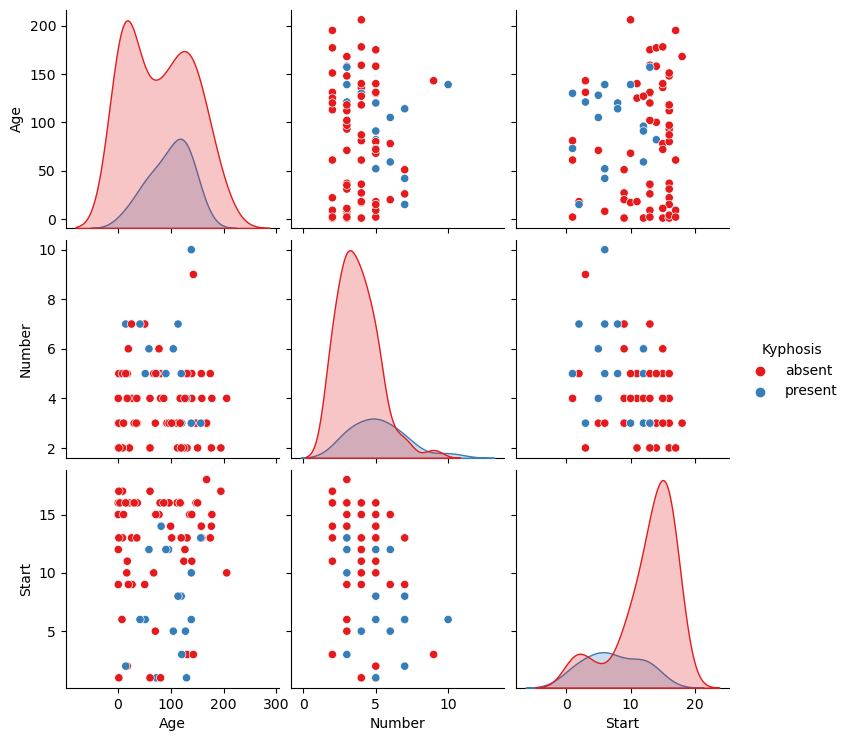

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        20
     present       0.50      0.40      0.44         5

    accuracy                           0.80        25
   macro avg       0.68      0.65      0.66        25
weighted avg       0.79      0.80      0.79        25



In [14]:
print(confusion_matrix(y_test,predictions))

[[18  2]
 [ 3  2]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [24]:
from IPython.display import Image  
from io import StringIO  
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

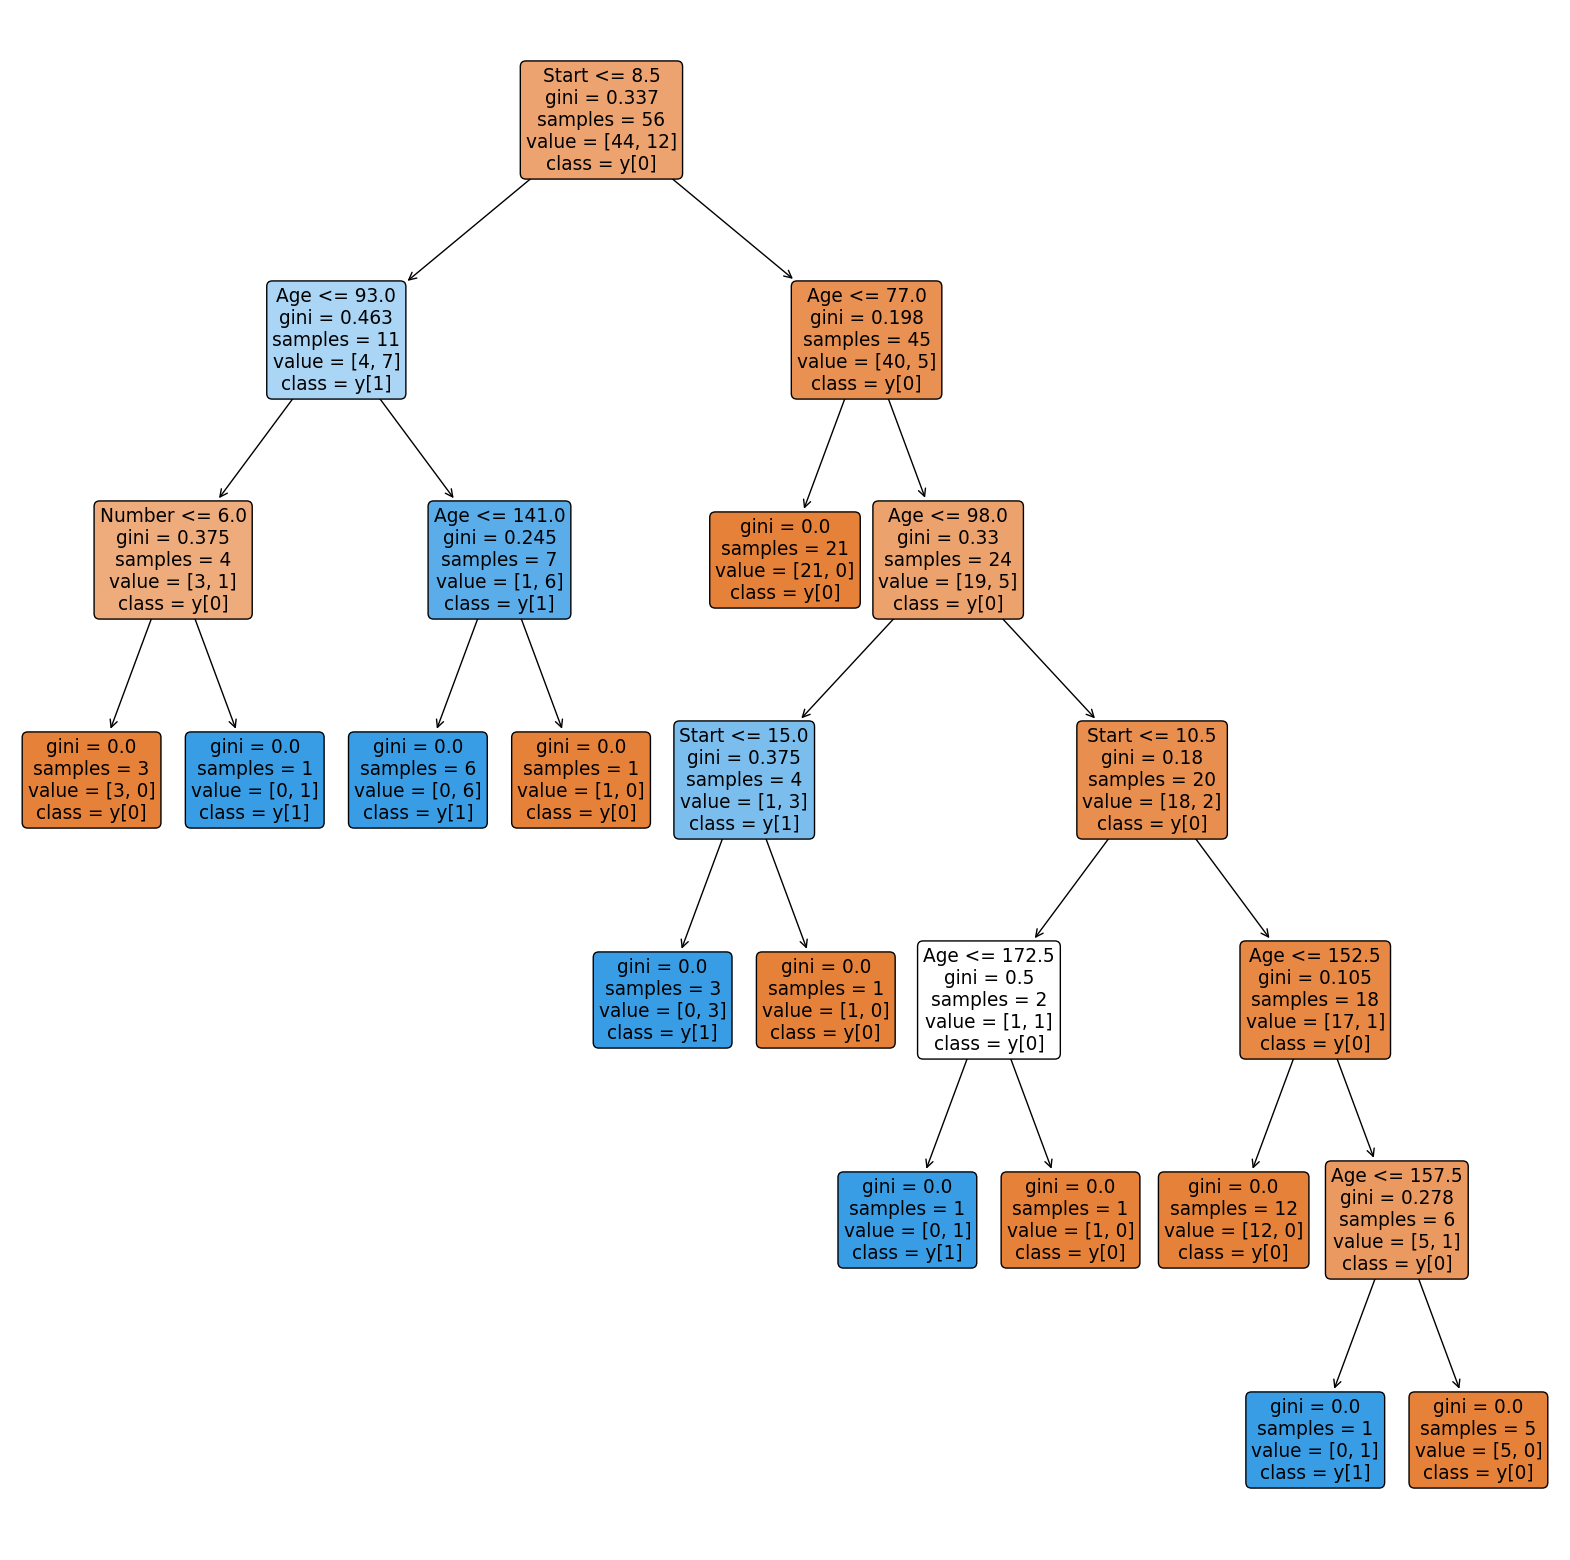

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,20))  # Adjust figure size if necessary
plot_tree(dtree, feature_names=features, filled=True, rounded=True, class_names=True)

# Show the plot
plt.show()

* Decision: This is the initial decision point. In your case, the decision is based on the "Start" feature (Start <= 8.5).

* gini: The Gini impurity (or Gini index) measures how "pure" a node is. A lower Gini value indicates a purer node (i.e., mostly one class).

* samples: This indicates the total number of data points that are in this node. In the root, it shows samples = 56, meaning there are 56 data points in total.

* value: The value tells us how many data points in this node belong to each class. For example, in the root node, value = [44, 12] means that out of the 56 total points, 44 belong to class 0 and 12 belong to class 1.

* class: This indicates the predicted class for this node. For example, the root node has class = y[0], meaning the predicted class for this node is class 0.

Gini impurity measures how "mixed" the classes in a group are. It's a way of telling us how impure or uncertain a group of things is.
If all the items in a group belong to the same class, the group is considered pure, and the Gini impurity will be 0 (which means no impurity at all).
If the items in the group are split between different classes, the Gini impurity will be higher, meaning the group is more mixed.

## Random Forests

Now let's compare the decision tree model to a random forest.

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
#n_estimators refers to the number of trees in the random forest.
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
rfc_pred = rfc.predict(X_test)

In [36]:
print(confusion_matrix(y_test,rfc_pred))

[[19  1]
 [ 4  1]]


In [37]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.83      0.95      0.88        20
     present       0.50      0.20      0.29         5

    accuracy                           0.80        25
   macro avg       0.66      0.57      0.58        25
weighted avg       0.76      0.80      0.76        25



# Great Job!